In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import ecco_v4_py as ecco
import requests

In [6]:
ds_tr =xr.open_dataset('testing_transport_data.nc')
ds_srf =xr.open_dataset('testing_surfAtm_data.nc')

In [7]:
ds_tr

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50, k_p1: 51, tile: 13, time: 1, nv: 2, nb: 4)
Coordinates: (12/22)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...         ...
    Zu         (k_u) float32 ...
    Zl         (k_l) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
    XC_bnds    (tile, j, i, nb) float32 ...
    YC_bnds    (tile, j, i, nb) float32 ...
    Z_bnds     (k, nv) float32 ...
Dimensions without coordinates: nv, nb
Data variables:
    ADVx_TH    (time, k, tile, j, i_g) float32 ...
    DFxE_TH    (time, k, tile, j, i_g) float32 ...
    ADVy_TH    (time, k, tile, j_g, i) float32 ...
    DFyE_TH    (time, k, tile, j_g, i) float32 ...
    ADVr_TH    (time, k_l, tile, j, i) float32 ...
    DFrE_TH    (time, k_l, tile, j, i) float32 ...
    DFrI_TH    (time, k_l, tile, j, i) float32 ...
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2014-01-02T00:00:00
    time_coverage_resolution:        P1D
    time_coverage_start:             2014-01-01T00:00:00
    title:                           ECCO Ocean Three-Dimensional Potential T...
    uuid:                            d8ccbb68-4162-11eb-8cd9-0cc47a3ff72e

-179.875 179.875
-180.0 180.0
-89.875 89.875
-90.0 90.0


C:\Users\uv20102\Anaconda3\envs\CMIP6_field_analysis_env\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\uv20102\Anaconda3\envs\CMIP6_field_analysis_env\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\uv20102\Anaconda3\envs\CMIP6_field_analysis_env\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


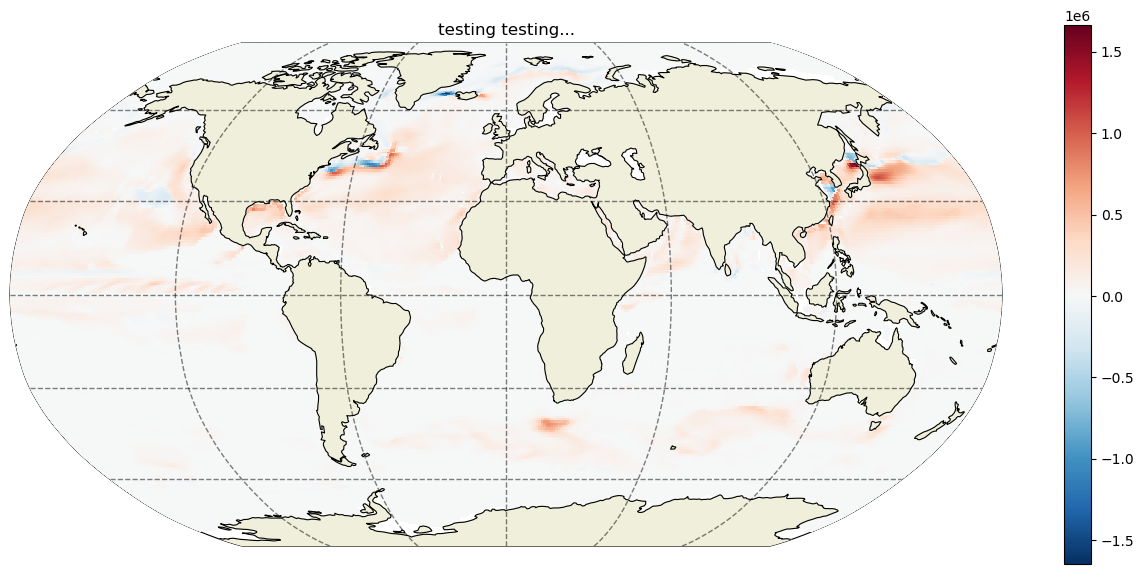

In [8]:
# test plot, seems the grid info is actually in the files, which is nice

vdiff  = ds_tr.DFrE_TH.isel(time=0, k_l=3)
# mask to nan where hFacC(k=0) = 0
#SSH  = SSH.where(grid.hFacC.isel(k=0))

fig  = plt.figure(figsize=(16,7))

ecco.plot_proj_to_latlon_grid(ds_tr.XC, ds_tr.YC, vdiff, 
                              show_colorbar=True,
)
plt.title('testing testing...')
plt.show()


In [10]:
ds_srf = ds_srf.rename({'EXFatemp':'temp'})

In [11]:
ds_srf

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, tile: 13, time: 1, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 2014-06-16
    ...         ...
    YC         (tile, j, i) float32 ...
    XG         (tile, j_g, i_g) float32 ...
    YG         (tile, j_g, i_g) float32 ...
    time_bnds  (time, nv) datetime64[ns] 2014-06-01 2014-07-01
    XC_bnds    (tile, j, i, nb) float32 ...
    YC_bnds    (tile, j, i, nb) float32 ...
Dimensions without coordinates: nv, nb
Data variables:
    temp       (time, tile, j, i) float32 ...
    EXFaqh     (time, tile, j, i) float32 ...
    EXFuwind   (time, tile, j, i) float32 ...
    EXFvwind   (time, tile, j, i) float32 ...
    EXFwspee   (time, tile, j, i) float32 ...
    EXFpress   (time, tile, j, i) float32 ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2014-07-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2014-06-01T00:00:00
    title:                        ECCO Atmosphere Surface Temperature, Humidi...
    uuid:                         7fd4ef72-400d-11eb-9d69-0cc47a3f49c3